### Расчет показателя Retention Rate игроков (по дням от даты регистрации)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
reg_data = pd.read_csv('problem1-auth_data.csv', sep=';')

In [36]:
auth_data = pd.read_csv('problem1-reg_data.csv', sep=';')

In [38]:
# Мерджим датафреймы
all_data = pd.merge(auth_data, reg_data, how='left', on=['uid'])

In [39]:
# Переименуем колонки для лучшей читаемости
all_data = all_data.rename(columns={'uid': 'user_id', 'auth_ts': 'authorization', 'reg_ts': 'registration'})

In [40]:
# Приведем дату к datetime
all_data.authorization = pd.to_datetime(all_data['authorization'], unit='s')
all_data.registration = pd.to_datetime(all_data['registration'], unit='s')

In [41]:
# Создадим колонки с годом и месяцем, чтобы впоследующем тестировать функцию на одном месяце
all_data['mouth_reg'] = all_data['registration'].dt.strftime('%Y-%m')

In [42]:
# Создаем датафрейм, где будут данные только за один месяц (сентябрь 2020)
all_data_2020_09 = all_data.query('mouth_reg=="2020-09"')

In [43]:
all_data_2020_09.head()

,registration,user_id,authorization,mouth_reg
9545203,2020-09-01 00:00:13,1070035,2020-09-01 00:00:13,2020-09
9545204,2020-09-01 00:00:13,1070035,2020-09-02 22:06:04,2020-09
9545205,2020-09-01 00:00:13,1070035,2020-09-09 01:38:14,2020-09
9545206,2020-09-01 00:00:13,1070035,2020-09-10 02:05:43,2020-09
9545207,2020-09-01 00:00:13,1070035,2020-09-14 11:22:06,2020-09


In [44]:
# Найдем количество дней с момента регистрации. Для удобства восприятия прибавляем единицу к разности.
all_data_2020_09['seniority'] = (all_data_2020_09['authorization'] - all_data_2020_09['registration']).dt.days + 1

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_8208/4134112539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_2020_09['seniority'] = (all_data_2020_09['authorization'] - all_data_2020_09['registration']).dt.days + 1


In [45]:
all_data_2020_09.authorization = all_data_2020_09.authorization.dt.date
all_data_2020_09.registration = all_data_2020_09.registration.dt.date

C:\Anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [46]:
# Создадим когорты из дат регистрации

In [47]:
all_data_2020_09 = all_data_2020_09.astype({'user_id': 'str'})

In [48]:
group = all_data_2020_09.groupby(['registration', 'seniority'])
cohort_data = group['user_id'].size()

In [49]:
cohort_data = cohort_data.reset_index()

In [50]:
cohort_data

,registration,seniority,user_id
0,2020-09-01,1,1586
1,2020-09-01,2,54
2,2020-09-01,3,79
3,2020-09-01,4,77
4,2020-09-01,5,82
...,...,...,...
271,2020-09-21,2,68
272,2020-09-21,3,12
273,2020-09-22,1,1641
274,2020-09-22,2,14


In [51]:
cohort_counts = cohort_data.pivot(index='registration', columns='seniority', values='user_id')

In [52]:
cohort_counts

seniority,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
registration,,,,,,,,,,,,,,,,,,,,,
2020-09-01,1586.0,54.0,79.0,77.0,82.0,83.0,125.0,64.0,78.0,75.0,...,75.0,70.0,70.0,80.0,68.0,75.0,50.0,64.0,54.0,8.0
2020-09-02,1588.0,72.0,64.0,87.0,97.0,103.0,120.0,75.0,66.0,78.0,...,70.0,87.0,65.0,86.0,60.0,62.0,72.0,60.0,13.0,NaN
2020-09-03,1591.0,76.0,88.0,89.0,95.0,128.0,136.0,77.0,101.0,97.0,...,89.0,84.0,85.0,71.0,79.0,83.0,66.0,11.0,NaN,NaN
2020-09-04,1593.0,61.0,65.0,66.0,79.0,118.0,121.0,62.0,71.0,77.0,...,84.0,70.0,68.0,77.0,70.0,65.0,13.0,NaN,NaN,NaN
2020-09-05,1596.0,78.0,64.0,81.0,85.0,118.0,109.0,65.0,85.0,90.0,...,92.0,75.0,73.0,83.0,58.0,14.0,NaN,NaN,NaN,NaN
2020-09-06,1599.0,79.0,77.0,88.0,90.0,97.0,125.0,81.0,101.0,77.0,...,83.0,84.0,74.0,61.0,17.0,NaN,NaN,NaN,NaN,NaN
2020-09-07,1601.0,83.0,70.0,80.0,101.0,109.0,105.0,64.0,80.0,97.0,...,78.0,64.0,79.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-08,1604.0,63.0,58.0,74.0,92.0,124.0,139.0,72.0,84.0,88.0,...,80.0,67.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,1607.0,47.0,66.0,84.0,106.0,95.0,107.0,75.0,67.0,77.0,...,70.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
base = cohort_counts[1]

In [54]:
retention = cohort_counts.divide(base, axis=0).round(3)

In [55]:
retention

seniority,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
registration,,,,,,,,,,,,,,,,,,,,,
2020-09-01,1.0,0.034,0.050,0.049,0.052,0.052,0.079,0.040,0.049,0.047,...,0.047,0.044,0.044,0.050,0.043,0.047,0.032,0.040,0.034,0.005
2020-09-02,1.0,0.045,0.040,0.055,0.061,0.065,0.076,0.047,0.042,0.049,...,0.044,0.055,0.041,0.054,0.038,0.039,0.045,0.038,0.008,NaN
2020-09-03,1.0,0.048,0.055,0.056,0.060,0.080,0.085,0.048,0.063,0.061,...,0.056,0.053,0.053,0.045,0.050,0.052,0.041,0.007,NaN,NaN
2020-09-04,1.0,0.038,0.041,0.041,0.050,0.074,0.076,0.039,0.045,0.048,...,0.053,0.044,0.043,0.048,0.044,0.041,0.008,NaN,NaN,NaN
2020-09-05,1.0,0.049,0.040,0.051,0.053,0.074,0.068,0.041,0.053,0.056,...,0.058,0.047,0.046,0.052,0.036,0.009,NaN,NaN,NaN,NaN
2020-09-06,1.0,0.049,0.048,0.055,0.056,0.061,0.078,0.051,0.063,0.048,...,0.052,0.053,0.046,0.038,0.011,NaN,NaN,NaN,NaN,NaN
2020-09-07,1.0,0.052,0.044,0.050,0.063,0.068,0.066,0.040,0.050,0.061,...,0.049,0.040,0.049,0.013,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-08,1.0,0.039,0.036,0.046,0.057,0.077,0.087,0.045,0.052,0.055,...,0.050,0.042,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,1.0,0.029,0.041,0.052,0.066,0.059,0.067,0.047,0.042,0.048,...,0.044,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


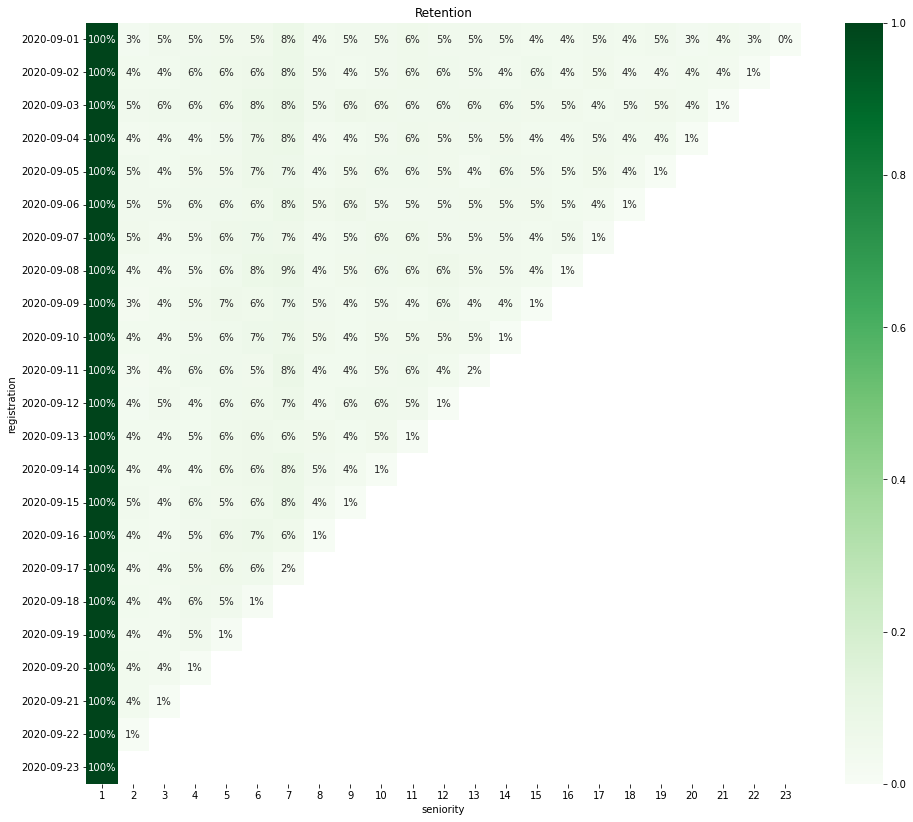

In [56]:
# Retention heatmap

plt.figure(figsize=(16, 14))
plt.title('Retention')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1, cmap='Greens')